In [12]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
inp0 = pd.read_csv("Social_Network_Ads.csv")
inp0.head()

,User ID,Gender,Age,EstimatedSalary,Clicked
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Train test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_train, df_test = train_test_split(inp0, train_size=0.7, random_state=42)

In [16]:
X_train = df_train.drop('Clicked', axis=1)
y_train = df_train[['Clicked']]

In [17]:
X_test = df_test.drop('Clicked', axis=1)
y_test = df_test[['Clicked']]

In [18]:
X_train.shape, X_test.shape

((280, 4), (120, 4))

In [19]:
X_train.head()

,User ID,Gender,Age,EstimatedSalary
157,15602373,Male,29,75000
109,15697997,Female,38,80000
17,15617482,Male,45,26000
347,15768151,Female,54,108000
24,15705113,Male,46,23000


In [20]:
X_train.drop('User ID', axis=1, inplace=True)
X_test.drop('User ID', axis=1, inplace=True)

In [21]:
X_train.head()

,Gender,Age,EstimatedSalary
157,Male,29,75000
109,Female,38,80000
17,Male,45,26000
347,Female,54,108000
24,Male,46,23000


#### Encode gender

In [25]:
X_train.Gender = X_train.Gender.map({'Male':0, 'Female':1}) 
X_test.Gender = X_test.Gender.map({'Male':0, 'Female':1}) 

In [27]:
X_train.head()

,Gender,Age,EstimatedSalary
157,0,29,75000
109,1,38,80000
17,0,45,26000
347,1,54,108000
24,0,46,23000


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(X_train, y_train)

C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [31]:
lr.coef_

array([[-5.56523690e-04, -1.13269662e-02,  1.72596487e-06]])

In [32]:
X_train.columns

Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [ ]:
-0.00056 (Gender) -0.0113 (Age) + 0.0000173(EstimatedSalary) - 0.0013

0: Male  
1: Female    

#### Performance on the train and test set

In [34]:
from sklearn.metrics import accuracy_score, classification_report

In [35]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [36]:
accuracy_score(y_train, y_train_pred)

0.6571428571428571

In [38]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       184
           1       0.00      0.00      0.00        96

    accuracy                           0.66       280
   macro avg       0.33      0.50      0.40       280
weighted avg       0.43      0.66      0.52       280



In [39]:
inp0.Clicked.value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Clicked, dtype: float64

#### Class Imbalance

In [40]:
lr = LogisticRegression(class_weight='balanced')

In [41]:
lr.fit(X_train, y_train)

C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(class_weight='balanced')

In [42]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [43]:
accuracy_score(y_train, y_train_pred)

0.34285714285714286

In [45]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       184
           1       0.34      1.00      0.51        96

    accuracy                           0.34       280
   macro avg       0.17      0.50      0.26       280
weighted avg       0.12      0.34      0.18       280



#### Probability threshold?

In [47]:
lr.classes_

array([0, 1], dtype=int64)

In [49]:
y_train_prob = lr.predict_proba(X_train)[:,1]
y_train_prob[:5]

array([0.57162348, 0.58054524, 0.54650495, 0.60967826, 0.54497064])

In [60]:
y_train_pred = np.where(y_train_prob > 0.6, 1, 0)

In [61]:
accuracy_score(y_train, y_train_pred)

0.7785714285714286

In [62]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       184
           1       0.84      0.44      0.58        96

    accuracy                           0.78       280
   macro avg       0.80      0.70      0.71       280
weighted avg       0.79      0.78      0.76       280



In [45]:
#Old
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       184
           1       0.34      1.00      0.51        96

    accuracy                           0.34       280
   macro avg       0.17      0.50      0.26       280
weighted avg       0.12      0.34      0.18       280



#### On the test set

In [63]:
y_test_prob = lr.predict_proba(X_test)[:,1]

In [74]:
y_test_pred = np.where(y_test_prob > 0.6, 1, 0)

In [75]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83        73
           1       0.95      0.38      0.55        47

    accuracy                           0.75       120
   macro avg       0.83      0.68      0.69       120
weighted avg       0.80      0.75      0.72       120



### ROC Curve

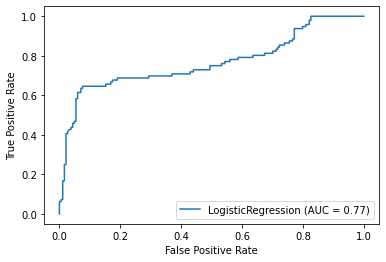

In [81]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train, y_train)
plt.show()

### KNN Classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
?KNeighborsClassifier

In [88]:
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

In [89]:
knn.fit(X_train, y_train)

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(n_neighbors=3)

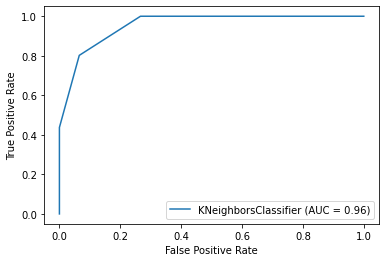

In [90]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn, X_train, y_train)
plt.show()

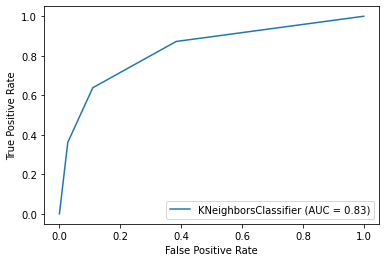

In [91]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [ ]:
1000000

In [ ]:
10000

In [93]:
10000 * 10000000

100000000000